In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

import spacy
import re as re
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from gensim.models import doc2vec
from collections import namedtuple
nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
import csv
import chardet
import codecs
import nltk


C:\Users\mille\Conda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [167]:
df = pd.read_csv('/Users/mille/Desktop/Unit 4 - Capstone/songdata.csv')

In [168]:
df = df.drop(columns=['link'])

In [169]:
df['text'] = df['text'].str.replace('\n', '')
df['text'] = df['text'].str.replace("'", '')
df['text'] = df['text'].str.replace(',', '')
df['text'] = df['text'].str.replace('?', '')


df.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,Look at her face its a wonderful face And it ...
1,ABBA,"Andante, Andante",Take it easy with me please Touch me gently l...
2,ABBA,As Good As New,Ill never know why I had to go Why I had to p...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [170]:
df['text'][0]

'Look at her face its a wonderful face  And it means something special to me  Look at the way that she smiles when she sees me  How lucky can one fellow be    Shes just my kind of girl she makes me feel fine  Who could ever believe that she could be mine  Shes just my kind of girl without her Im blue  And if she ever leaves me what could I do what could I do    And when we go for a walk in the park  And she holds me and squeezes my hand  Well go on walking for hours and talking  About all the things that we plan    Shes just my kind of girl she makes me feel fine  Who could ever believe that she could be mine  Shes just my kind of girl without her Im blue  And if she ever leaves me what could I do what could I do'

In [171]:
df['song'] = df['song'].str.replace("'", '')
df['song'] = df['song'].str.replace(',', '')
df['song'] = df['song'].str.replace('-', ' ')


df.head()

,artist,song,text
0,ABBA,Ahes My Kind Of Girl,Look at her face its a wonderful face And it ...
1,ABBA,Andante Andante,Take it easy with me please Touch me gently l...
2,ABBA,As Good As New,Ill never know why I had to go Why I had to p...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang A Boomerang,Making somebody happy is a question of give an...


In [172]:
df['song'][1:10]

1       Andante Andante
2        As Good As New
3                  Bang
4      Bang A Boomerang
5    Burning My Bridges
6             Cassandra
7            Chiquitita
8           Crazy World
9       Crying Over You
Name: song, dtype: object

In [173]:
df.index
df.columns

pd.DataFrame(df)
#complete dataset 365 rows x 11 columns 

df.shape


(57650, 3)

In [174]:
df.isnull().sum()


artist    0
song      0
text      0
dtype: int64

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 3 columns):
artist    57650 non-null object
song      57650 non-null object
text      57650 non-null object
dtypes: object(3)
memory usage: 1.3+ MB


In [176]:
stopwords = nltk.corpus.stopwords.words('english')


In [177]:
print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


In [179]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 3 columns):
artist    57650 non-null object
song      57650 non-null object
text      57650 non-null object
dtypes: object(3)
memory usage: 1.3+ MB
None


In [180]:
pd.set_option("display.max_rows", 999)

In [181]:
count = df['artist'].value_counts()


In [182]:
#showing all artists in the dataset 
print('The count of artist is:', count)


The count of artist is: Donna Summer                                    191
Gordon Lightfoot                                189
Bob Dylan                                       188
George Strait                                   188
Loretta Lynn                                    187
Reba Mcentire                                   187
Cher                                            187
Alabama                                         187
Chaka Khan                                      186
Dean Martin                                     186
Neil Young                                      185
Hank Williams Jr.                               185
America                                         184
Nazareth                                        184
Indigo Girls                                    184
Cliff Richard                                   184
Johnny Cash                                     183
Kiss                                            183
Chris Rea                               

Name: artist, dtype: int64


# Setting it all up

**Set up train/test split**

y=artist

X=song, text 

**MODELS**

1. Other methods – mean-shift, spectral, affinity
2. Neural network - Supervised & Unsupervised 
3. NLP - Supervised & Unsupervised
4. word2vec 

**REPORT**

3-5 pages report about the process...
A. cited literature (google scholar)
    1. Introduction (why and purpose)
    2. Methods used (programs and statistical model i.e equations)
    3. Results (tables, graphs, comparing all models in one place)
    4. Conclusion/Discusion (what does all this mean, how does it benifit, insights, search engines, how can we use this            stuff)
    5. Literature cited (...)

# Exploratory Data Analysis 

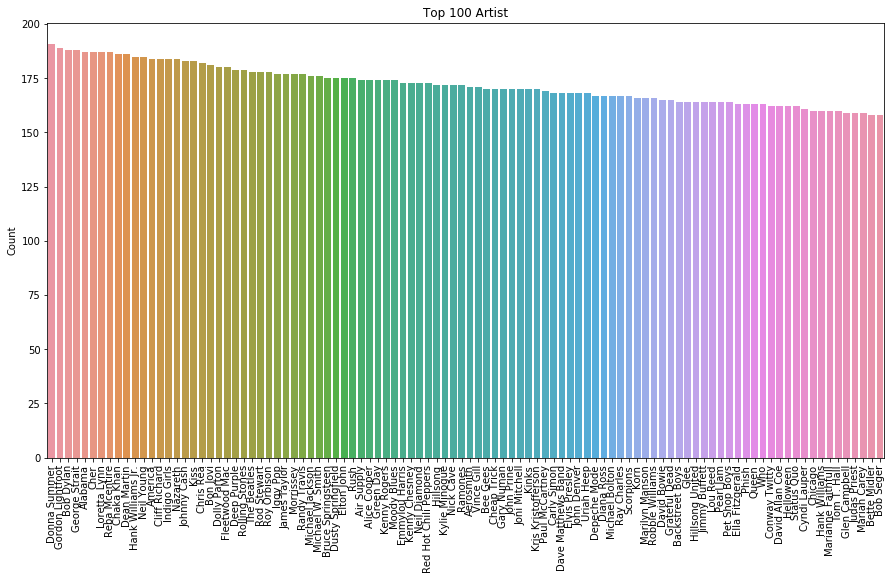

In [72]:
artist_count = Counter(df['artist'].dropna()).most_common(100)
artist_keys = [artist[0] for artist in artist_count]
artist_val = [artist[1] for artist in artist_count]

fig,ax = plt.subplots(figsize = (15,8))
sns.barplot(x = artist_keys, y = artist_val)
plt.title('Top 100 Artist')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

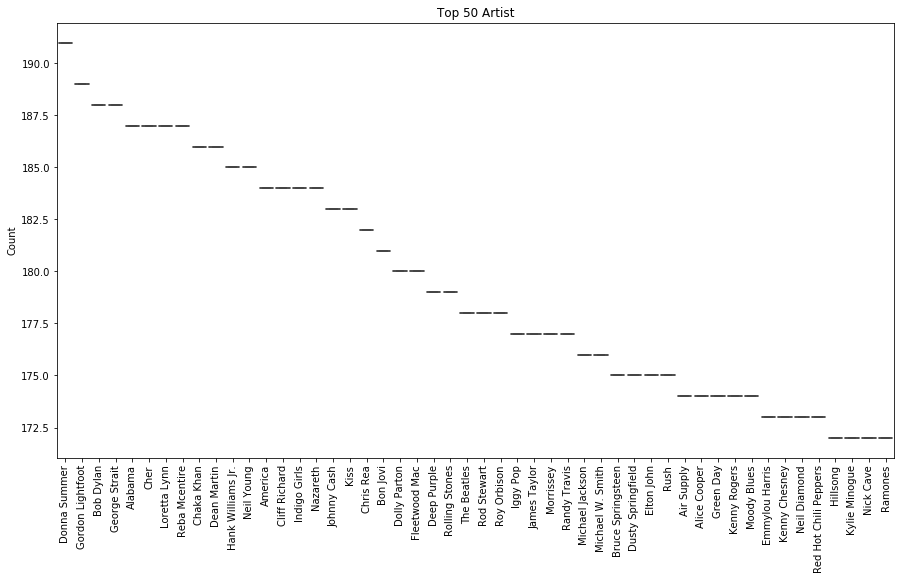

In [73]:
artist_count = Counter(df['artist'].dropna()).most_common(50)
artist_keys = [artist[0] for artist in artist_count]
artist_val = [artist[1] for artist in artist_count]

fig,ax = plt.subplots(figsize = (15,8))
sns.boxplot(x = artist_keys, y = artist_val)
plt.title('Top 50 Artist')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [74]:
df.groupby(['song']).count()


,artist,text
song,,
Human,1,1
(Aint That) Just Like Me,1,1
(Another Song) All Over Again,1,1
(Dear Mr. Gable) You Made Me Love You,1,1
(Dont Fear) The Reaper,1,1
(Everybody) Get Down,1,1
(Feels Like Im) Walking On Water,1,1
(Get Off Your) High Horse Lady,1,1
(Hey Wont You Play) Another Somebody Done Somebody Wrong Song,1,1


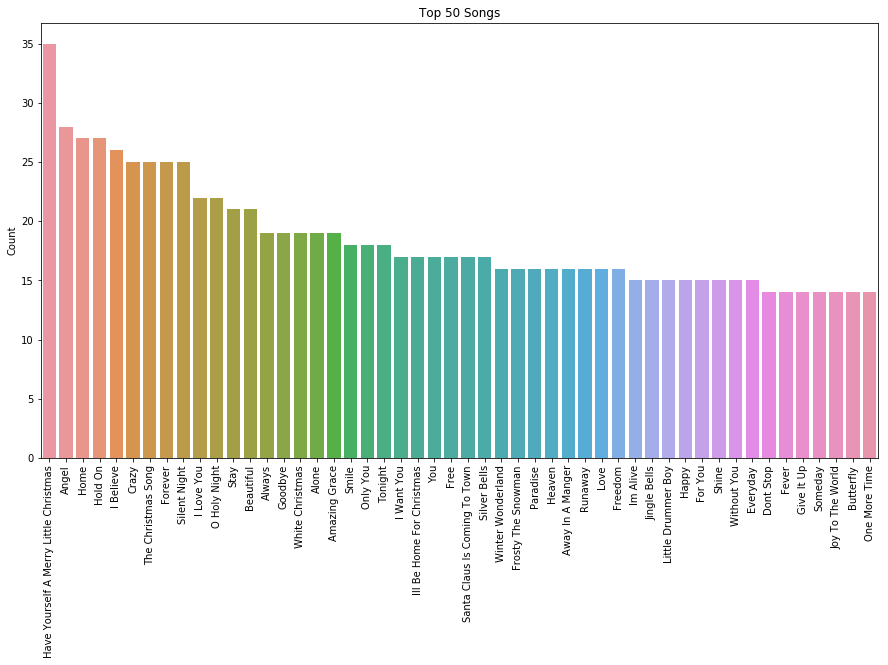

In [75]:
artist_count = Counter(df['song'].dropna()).most_common(50)
artist_keys = [song[0] for song in artist_count]
artist_val = [song[1] for song in artist_count]

fig,ax = plt.subplots(figsize = (15,8))
sns.barplot(x = artist_keys, y = artist_val)
plt.title('Top 50 Songs')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

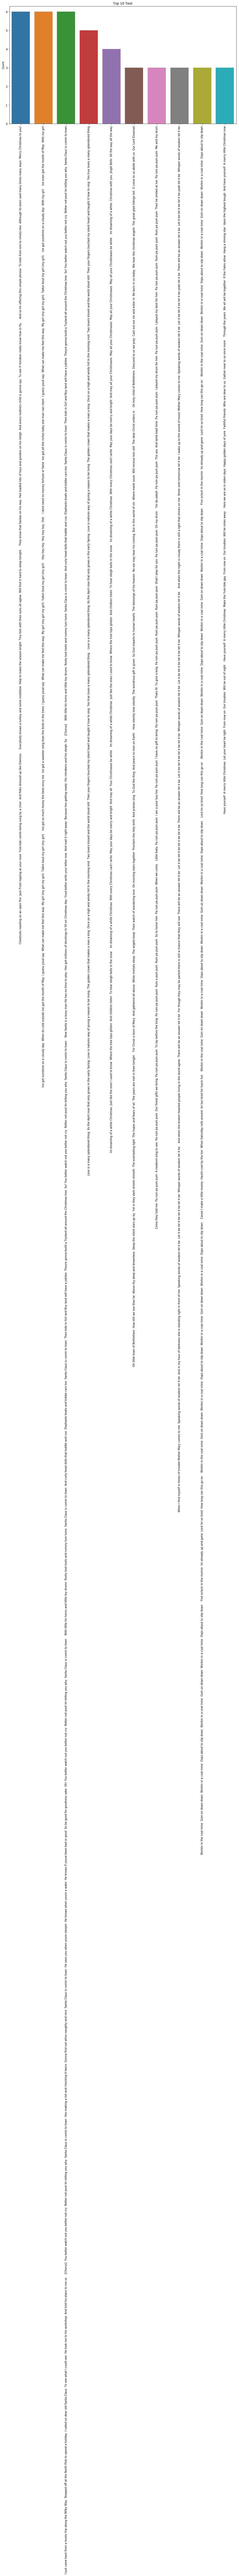

In [76]:
artist_count = Counter(df['text'].dropna()).most_common(10)
artist_keys = [text[0] for text in artist_count]
artist_val = [text[1] for text in artist_count]

fig,ax = plt.subplots(figsize = (15,8))
sns.barplot(x = artist_keys, y = artist_val)
plt.title('Top 10 Text')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [77]:
from textblob import TextBlob


The sentiment polarity score works, we randomly select 5 reviews with the highest sentiment polarity score (1)
Polarity in sentiment analysis refers to identifying sentiment orientation (positive, neutral, and negative) in written or spoken language.

In [78]:
df['polarity_text'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len_text'] = df['text'].astype(str).apply(len)
df['word_count_text'] = df['text'].apply(lambda x: len(str(x).split()))

In [79]:
df['polarity_song'] = df['song'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len_song'] = df['song'].astype(str).apply(len)
df['word_count_song'] = df['song'].apply(lambda x: len(str(x).split()))

In [80]:
df['polarity_artist'] = df['artist'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len_artist'] = df['artist'].astype(str).apply(len)
df['word_count_artist'] = df['artist'].apply(lambda x: len(str(x).split()))

In [81]:
df.head()

,artist,song,text,polarity_text,review_len_text,word_count_text,polarity_song,review_len_song,word_count_song,polarity_artist,review_len_artist,word_count_artist
0,ABBA,Ahes My Kind Of Girl,Look at her face its a wonderful face And it ...,0.447619,721,153,0.600000,20,5,0.0,4,1
1,ABBA,Andante Andante,Take it easy with me please Touch me gently l...,0.202222,1349,260,0.000000,15,2,0.0,4,1
2,ABBA,As Good As New,Ill never know why I had to go Why I had to p...,0.281812,1408,312,0.418182,14,4,0.0,4,1
3,ABBA,Bang,Making somebody happy is a question of give an...,0.314286,1185,200,0.000000,4,1,0.0,4,1
4,ABBA,Bang A Boomerang,Making somebody happy is a question of give an...,0.314286,1201,198,0.000000,16,3,0.0,4,1


In [125]:
df.describe()

,polarity_text,review_len_text,word_count_text,polarity_song,review_len_song,word_count_song,polarity_artist,review_len_artist,word_count_artist
count,57650.000000,57650.000000,57650.000000,57650.000000,57650.000000,57650.000000,57650.000000,57650.000000,57650.000000
mean,0.094596,1113.679133,219.320746,0.038461,15.376357,3.103625,-0.000677,10.869211,1.826245
std,0.179635,544.534287,108.686452,0.220228,7.188944,1.607719,0.113150,3.866315,0.606511
min,-1.000000,362.000000,37.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
25%,-0.016987,740.000000,145.000000,0.000000,10.000000,2.000000,0.000000,9.000000,1.000000
50%,0.089034,993.000000,195.000000,0.000000,14.000000,3.000000,0.000000,11.000000,2.000000
75%,0.206546,1336.000000,263.000000,0.000000,19.000000,4.000000,0.000000,13.000000,2.000000
max,1.000000,3879.000000,827.000000,1.000000,76.000000,16.000000,0.850000,44.000000,6.000000


In [82]:
#Text data in songs 
#All binary features
text_data=df.loc[:,'polarity_text':'word_count_text']

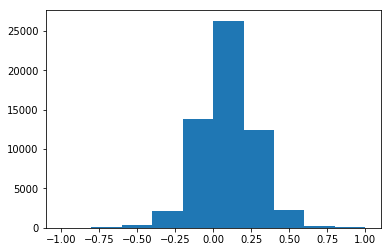

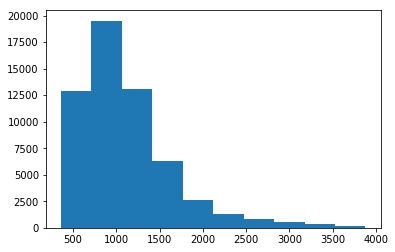

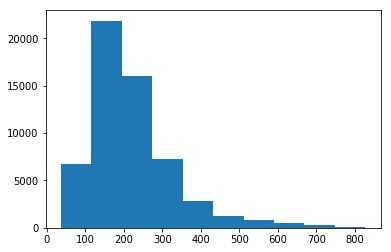

In [83]:
for i, col in enumerate(text_data.columns):
    plt.figure(i)
    plt.hist(text_data[col])

In [84]:
#Artist data in songs 
#All binary features
artist_data=df.loc[:,'polarity_artist':'word_count_artist']

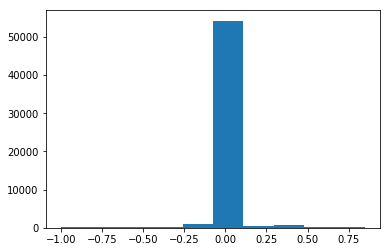

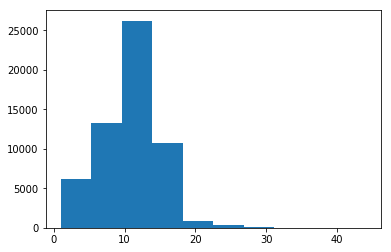

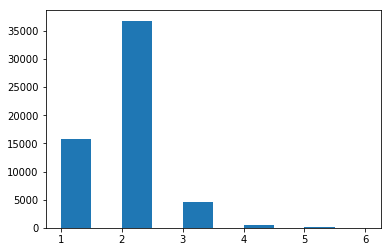

In [85]:
for i, col in enumerate(artist_data.columns):
    plt.figure(i)
    plt.hist(artist_data[col])

In [86]:
#Song data in songs 
#All binary features
song_data=df.loc[:,'polarity_song':'word_count_song']

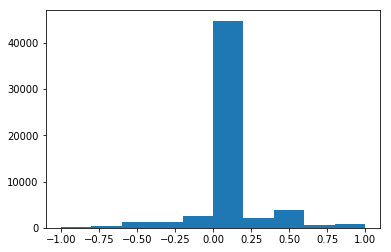

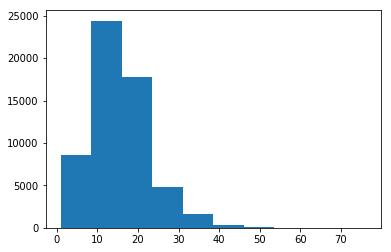

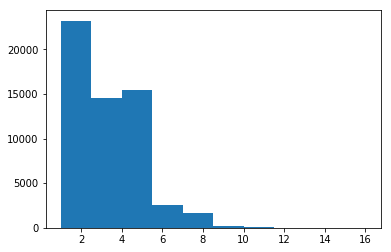

In [87]:
for i, col in enumerate(song_data.columns):
    plt.figure(i)
    plt.hist(song_data[col])

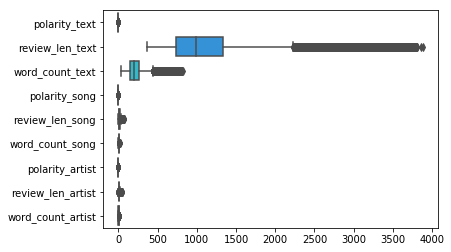

In [117]:
sns.boxplot(data=df,palette='rainbow',orient='h')

In [104]:
print("Document Count")
print(df.groupby('artist')['text'].count())
print("Word Count")
df.groupby('artist').apply(lambda x: x.text.apply(lambda x: len(x.split())).sum())

Document Count
artist
'n Sync                                          93
ABBA                                            113
Ace Of Base                                      74
Adam Sandler                                     70
Adele                                            54
Aerosmith                                       171
Air Supply                                      174
Aiza Seguerra                                    25
Alabama                                         187
Alan Parsons Project                            102
Aled Jones                                       23
Alice Cooper                                    174
Alice In Chains                                  95
Alison Krauss                                   145
Allman Brothers Band                            116
Alphaville                                      105
America                                         184
Amy Grant                                       147
Andrea Bocelli                            

Name: text, dtype: int64
Word Count


artist
'n Sync                                         25052
ABBA                                            28299
Ace Of Base                                     17828
Adam Sandler                                    18206
Adele                                           15777
Aerosmith                                       38601
Air Supply                                      33972
Aiza Seguerra                                    5533
Alabama                                         37857
Alan Parsons Project                            21776
Aled Jones                                       3695
Alice Cooper                                    38643
Alice In Chains                                 16362
Alison Krauss                                   25135
Allman Brothers Band                            21165
Alphaville                                      19096
America                                         34511
Amy Grant                                       31994
Andrea Bocelli       

In [120]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

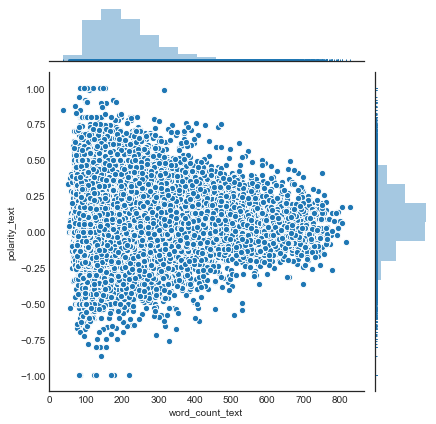

In [124]:
g = sns.jointplot("word_count_text", "polarity_text", data=df,
                  marginal_kws=dict(bins=15, rug=True),
                  annot_kws=dict(stat="r"),
                  s=40, edgecolor="w", linewidth=1)


**MODELS**

1. Other methods – mean-shift, spectral, affinity
2. Neural network - Supervised & Unsupervised 
3. NLP - Supervised & Unsupervised
4. word2vec 

In [127]:
# Remove newlines and other extra whitespace by splitting and rejoining.

# All done with cleanup? Let's see how it looks.
print('Extra whitespace removed:\n', df['text'][0:100])


Extra whitespace removed:
 0     Look at her face its a wonderful face  And it ...
1     Take it easy with me please  Touch me gently l...
2     Ill never know why I had to go  Why I had to p...
3     Making somebody happy is a question of give an...
4     Making somebody happy is a question of give an...
5     Well you hoot and you holler and you make me m...
6     Down in the street theyre all singing and shou...
7     Chiquitita tell me whats wrong  Youre enchaine...
8     I was out with the morning sun  Couldnt sleep ...
9     Im waitin for you baby  Im sitting all alone  ...
10    Oh my love it makes me sad.  Why did things tu...
11    You can dance you can jive having the time of ...
12    Changing moving in a circle  I can see your fa...
13    Youre so hot teasing me  So youre blue but I c...
14    Agnetha Were not the stars of a Hollywood movi...
15    I can hear how you work practising hard  Playi...
16    They came flying from far away now Im under th...
17    Every good man 

# Kmeans

In [133]:
df['text'] = df['text'].str.replace('\n', '')


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation

In [137]:
# components for features reduction
n_components = 7

# number of clusters we want
n_clusters = 7

# covert words into TFIDF metrics
tfidf = TfidfVectorizer(stop_words = 'english')
X_text = tfidf.fit_transform(df['text'])

# reduce dimensions
svd = TruncatedSVD(n_components=n_components, random_state = 0)
X_2d = svd.fit_transform(X_text)

# fit k-mean clustering
kmeans = KMeans(n_clusters=n_clusters, random_state = 0)

# predict our clusters for each song
X_clustered = kmeans.fit_predict(X_2d)

# display by groups
df_plot = pd.DataFrame(list(X_2d), list(X_clustered))
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'index': 'Cluster'}, inplace = True)
df_plot['Cluster'] = df_plot['Cluster'].astype(int)

print(df_plot.head())

print(df_plot.groupby('Cluster').agg({'Cluster': 'count'}))

   Cluster         0         1         2         3         4         5  \
0        2  0.183895 -0.060126 -0.031525  0.014581  0.054588 -0.006590   
1        6  0.085486 -0.019160  0.003873  0.017642 -0.027477 -0.007891   
2        6  0.091885  0.036220 -0.009392  0.000172  0.019997  0.007479   
3        6  0.071670  0.074906  0.008810  0.012853 -0.001403 -0.015452   
4        6  0.085157  0.084779  0.007989  0.013420  0.000017 -0.018803   

          6  
0  0.015711  
1  0.000197  
2  0.002685  
3  0.004816  
4  0.005636  
         Cluster
Cluster         
0           6881
1           2327
2           9581
3            338
4           4306
5           2140
6          32077


# Logistic regression

In [33]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mille/Desktop/Unit 4 - Capstone/songdata.csv')
df = df[['text','artist']]
df = df[pd.notnull(df['text'])]
df.head(10)

,text,artist
0,"Look at her face, it's a wonderful face \nAnd...",ABBA
1,"Take it easy with me, please \nTouch me gentl...",ABBA
2,I'll never know why I had to go \nWhy I had t...,ABBA
3,Making somebody happy is a question of give an...,ABBA
4,Making somebody happy is a question of give an...,ABBA
5,"Well, you hoot and you holler and you make me ...",ABBA
6,Down in the street they're all singing and sho...,ABBA
7,"Chiquitita, tell me what's wrong \nYou're enc...",ABBA
8,I was out with the morning sun \nCouldn't sle...,ABBA
9,I'm waitin' for you baby \nI'm sitting all al...,ABBA


In [34]:
df.shape


(57650, 2)

In [35]:
#the number of words in the text
df.index = range(57650)
df['text'].apply(lambda x: len(x.split(' '))).sum()

15205879

*There are 15 million words in the text column.*

In [36]:
df['text'] = df['text'].str.replace('\n', '')
df['text'] = df['text'].str.replace("'", '')
df['text'] = df['text'].str.replace(',', '')
df['text'] = df['text'].str.replace('?', '')


df.head()

,text,artist
0,Look at her face its a wonderful face And it ...,ABBA
1,Take it easy with me please Touch me gently l...,ABBA
2,Ill never know why I had to go Why I had to p...,ABBA
3,Making somebody happy is a question of give an...,ABBA
4,Making somebody happy is a question of give an...,ABBA


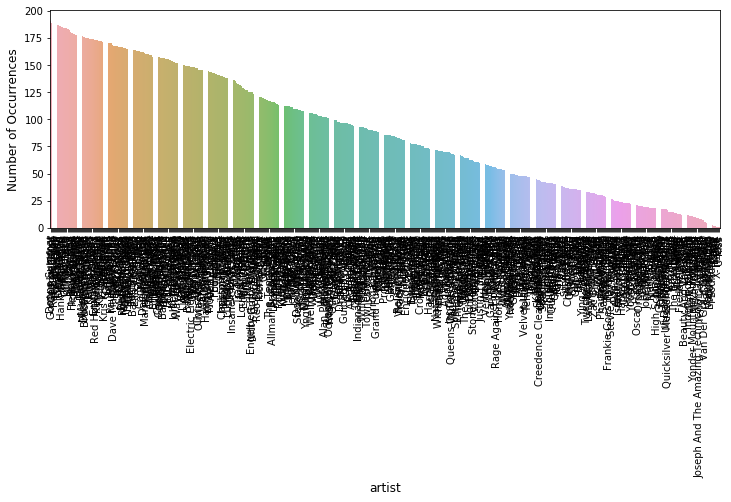

In [37]:
cnt_pro = df['artist'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('artist', fontsize=12)
plt.xticks(rotation=90)
plt.show();

Any imbalance among the classes?

In [38]:
def print_text(index):
    example = df[df.index == index][['text', 'artist']].values[0]
    if len(example) > 0:
        print(example[0])
        print('artist:', example[1])
print_text(12)

Changing moving in a circle  I can see your face in all of my dreams  Smiling laughing from the shadows  When I hear your voice I know what it means  I know it doesnt matter just how hard I try  Youre all the reason for my life    Disillusion disillusions all you left for me  How can I forget you when my world is breaking down  Youre all I had youre all I want  Disillusion disillusions now thats all I have    Wishing hoping chasing shadows  Did I see your face somewhere in the crowd  Thinking wondering what youre doing  I cant stop myself from crying out loud  They say my wound will heal and only leave a scar  But then they never shared our love    Disillusion disillusions all you left for me  How can I forget you when my world is breaking down  Youre all I had youre all I want  Disillusion disillusions now thats all I have    Disillusion disillusions now thats all I have
artist: ABBA


In [39]:
print_text(20)

Im down and I feel depressed  Sitting here just waiting  For next bus travelling  Downtown  Its a crying shame  Isnt it  The beautiful weather  If I could have my way  Well I would not be working  On a day like this I know what Id like to be  As free as a bumble bee  Take a sip from  Every flower  Free as a bumble bee  While away each lazy hour  What a good life  Lying laid back  Like an old railroad bum by the track  What a good life  Living outdoors  Lie in the grass and chew on a straw
artist: ABBA


In [40]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['text'] = df['text'].apply(cleanText)

In [41]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.artist]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['text']), tags=[r.artist]), axis=1)

In [42]:
train_tagged.values[30]


TaggedDocument(words=['words', 'and', 'music', 'by', 'bob', 'seger', 'went', 'out', 'in', 'norfork', 'hung', 'on', 'short', 'short', 'livin', 'with', 'bottle', 'of', 'wine', 'to', 'music', 'ladies', 'and', 'burned', 'out', 'babies', 'was', 'tryin', 'to', 'write', 'couple', 'of', 'lines', 'sherriff', 'gribbs', 'with', 'his', 'grim', 'ad', 'libs', 'spoutin', 'bout', 'the', 'crime', 'in', 'the', 'streets', 'and', 'women', 'were', 'screamin', 'and', 'some', 'were', 'dreamin', 'bout', 'the', 'crowd', 'between', 'the', 'sheets', 'you', 'know', 'that', 'music', 'died', 'hurt', 'my', 'pride', 'somehow', 'got', 'through', 'back', 'in', '72', 'somehow', 'we', 'made', 'it', 'to', 'baton', 'rouge', 'we', 'stayed', 'inside', 'for', 'week', 'we', 'werent', 'in', 'town', 'for', 'no', 'mardi', 'gras', 'so', 'we', 'decided', 'to', 'sleep', 'houston', 'yes', 'was', 'good', 'old', 'guest', 'tho', 'knows', 'how', 'bad', 'we', 'wanted', 'to', 'play', 'but', 'we', 'got', 'homesick', 'for', 'lincoln', 'park'

In [46]:
train_tagged.head()

12009    ([jealous, heart, oh, jealous, heart, stop, be...
15188    ([so, many, times, ive, walked, this, way, too...
39232    ([yea, mr., jt, now, what, you, got, for, me, ...
7375     ([dont, want, to, ever, fall, in, love, again,...
16476    ([hey, yo, puff, check, this, out, pa, im, tir...
dtype: object

### Logistic Regression 

In [47]:
Y = df['artist']
X = df['text']

In [48]:
# Apply to testing data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

train = lr.fit(X_train, y_train)

lr = LogisticRegression()
train = lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)

C:\Users\mille\Conda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'fifteen years le bing son  fought side by side with the americans  in the mountains and deltas of vietnam    in 75 saigon fell  and he left his command  and brought his family to the promised land    seabrook teas and the small towns  in the gulf of meico  it was delta country and reminded him of home    he worked as a machinist put his money away  and bought a shrimp boat with his cousin  and together they harvested galveston bay    in the mornin fore the sun come up  hed kiss his sleepin daughter  steer out through the channel  and casts his nets into the water    billy sutter fought with charlie company  in the highlands of quang tri  he was wounded in the battle of chu lai  and shipped home in 68    there he married and worked the gulf fishing grounds  in a boat thatd been his fathers  in the morning hed kiss his sleeping son  and cast his nets into the water    billy sat in front of his tv as the south fell  and the communists rolled into saigon  he and his friends watched as the refugees came  settle on the same streets and worked the coast they grew up on    soon in the bars around the harbor was talk  of america for americans  someone said "you want em out you got to burn em out"  and brought in the teas klan    one humid teas night there were three shadows on the harbor  come to burn the vietnamese boats into the sea  in the fires light shots rang out  two teans lay dead on the ground  le stood with a pistol in his hand    a jury acquitted him in self defense  as before the judge he did stand  but as he walked down the courthouse steps  billy said "my friend youre a dead man"    one late summer night le stood watch along the waterside  billy stood in the shadows  his k-bar knife in his hand  and the moon slipped behind the clouds    le lit a cigarette the bay was as still as glass  as he walked by billy stuck his knife into his pocket  took a breath and let him pass    in the early darkness billy rose up  went into the kitchen for a drink of water  kissed his sleeping wife  headed into the channel  and casts his nets into the water    of galveston bay'

In [ ]:
#fit lr

lr.fit(X_train, y_train)

# Apply to testing data
y_hat = lr.predict(X_test)

cross = pd.crosstab(y_hat, y_test)

print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
print(classification_report(y_test, y_hat))
print(cross)